# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**

In [2]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# **Data Wrangling**

In [3]:
day_df.info()
day_df.isna().sum()

# Rubah tanggal
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Mapping season dan weather supaya readable
season_map = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

weather_map = {
    1: "Clear",
    2: "Mist",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}

day_df["season"] = day_df["season"].map(season_map)
day_df["weathersit"] = day_df["weathersit"].map(weather_map)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# **EDA & Visualisasi**

## Pengaruh Musim

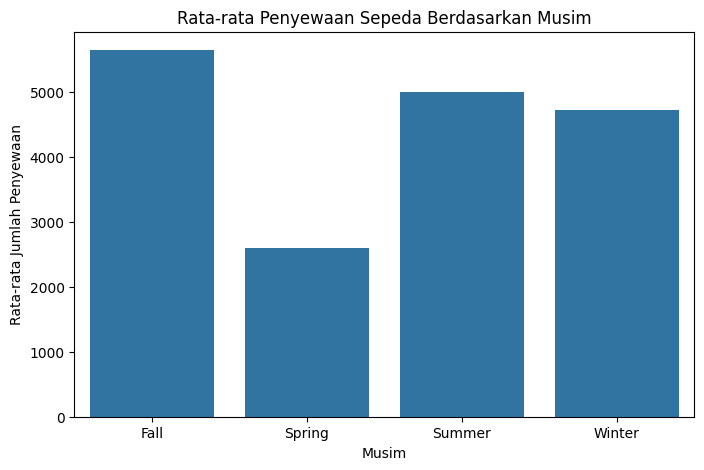

In [4]:
season_analysis = day_df.groupby("season")["cnt"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=season_analysis, x="season", y="cnt")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xlabel("Musim")
plt.show()

Musim dengan rata-rata tertinggi menunjukkan waktu optimal promosi dan ekspansi armada.

## Pengaruh Cuaca

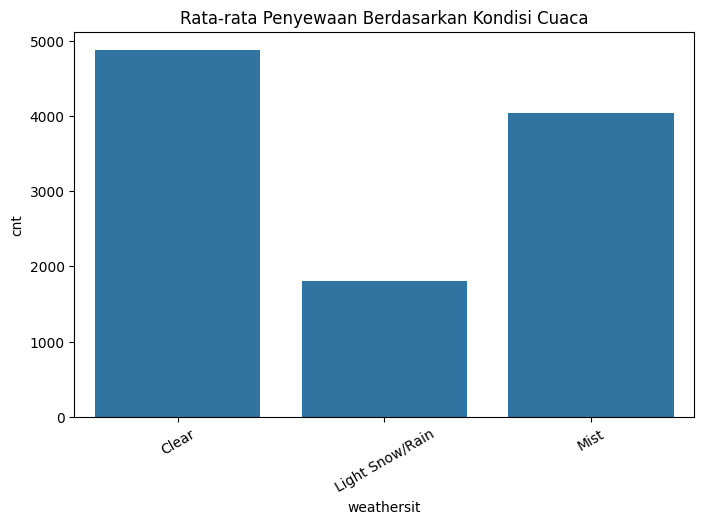

In [5]:
weather_analysis = day_df.groupby("weathersit")["cnt"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=weather_analysis, x="weathersit", y="cnt")
plt.title("Rata-rata Penyewaan Berdasarkan Kondisi Cuaca")
plt.xticks(rotation=30)
plt.show()

## Workingday vs Weekend

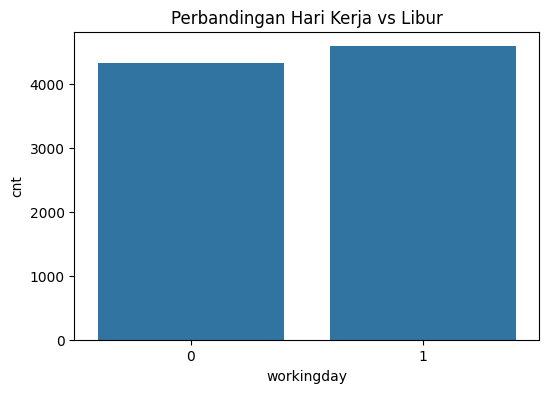

In [6]:
working_analysis = day_df.groupby("workingday")["cnt"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=working_analysis, x="workingday", y="cnt")
plt.title("Perbandingan Hari Kerja vs Libur")
plt.show()

In [7]:
# Clustering berdasarkan jumlah penyewaan
bins = [0, 2000, 4000, 7000]
labels = ["Low", "Medium", "High"]

day_df["rent_category"] = pd.cut(day_df["cnt"], bins=bins, labels=labels)

category_analysis = day_df["rent_category"].value_counts()

category_analysis

rent_category
High      358
Medium    181
Low        98
Name: count, dtype: int64

Pengelompokan ini membantu manajemen memahami distribusi hari dengan performa rendah, sedang, dan tinggi.

# **Simpan Data**

In [9]:
day_df.to_csv("dashboard/main_data.csv", index=False)